# Wrangle 2025

This code reformats the LTRM data to be in the format of (location, year, hydrological data, each fish species presence/absence).

For reference: [Data Dictionary](https://www.umesc.usgs.gov/cgi-bin/ltrmp/fish/fish_meta.pl)
***

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

From Kristen Bouska:

Merge the ltrm fish data with the aquatic areas dataset. Did a spatial merge and did not otherwise alter the data structure. The dataset here includes all sites where daytime electrofishing was used in Pools 4, 8 and 13. Removed sites that had ‘summary’ codes as 1 or 2, which indicate gear failure or an inaccessible site.

Following the field ‘batchno’ are fields associated with Aquatic Areas I and Aquatic Areas III. The field ‘AQUA_CODE3’ indicates contiguous floodplain lakes as ‘CFL’ and has a suite of associated metrics that follow, some of which may be explanatory for lentic fish clusters.

If we want to differentiate areas in the ‘impounded area’ of a pool, the field ‘AQUA_CODE1’ indicates those as ‘CIMP.’ Alternatively, included are river mile (‘RMILE’) and a rescaled river mile metric (‘RM_rescale’) as an approach to contrast upstream and downstream portions of the reach.

In [34]:
df_data = pd.read_csv("ltrm_fish_D_p4813_aa1_aa3_all.csv", low_memory=False)
pd.options.display.max_columns = None  # to display all columns
print(df_data.shape) # shows the number of rows and columns
df_data.head()

(314004, 176)


,site,barcode,fstation,sitetype,stratum,sdate,stime,fdate,ftime,pool,lcode,gear,period,rep,summary,project,effdist,effhr,effmin,pwrgoal,pwrused,volts,v_qf,amps,a_qf,pulses,p_qf,dutycyc,dc_qf,utmzone,utm_e,utm_n,gisgrid,zone15e,zone15n,gpsmeth,gpsacc,secchi,s_qf,temp,t_qf,depth,d_qf,cond,c_qf,current,cv_qf,do,do_qf,stageht,sh_qf,sveg92,vegd,eveg92,esveg92,substrt,snag,wingdyke,trib,riprap,inout,closing,flooded,othrstrc,labind,contanrs,shtcnt,totfishc,leader,pageno,rec_site,rownum,fishcode,length,tfs,grp_wdth,catch,weight,pathcode,subproj,userdef,recorder,nfsh_cnt,orphflag,batchno,OBJECTID_1,Join_Count,TARGET_FID,OBJECTID_12,AQUA_CODE_AA1,OBJECTID_12_13,Join_Count_1,TARGET_FID_1,OBJECTID_12_13_14,uniq_id,aa_num,AQUA_CODE_AA3,AQUA_DESC,pool_1,Area,Perimeter,Acres,Hectares,bath_pct,max_depth,avg_depth,sd_depth,tot_vol,area_gt50,area_gt100,area_gt200,area_gt300,avg_fetch,sdi,econ,sill,min_rm,max_rm,len_met,len_outl,pct_outl,num_outl,len_oute,pct_oute,num_oute,pct_aqveg,pct_opwat,len_terr,pct_terr,pct_chan,len_wetf,pct1wetf,pct2wetf,len_wd,wdl_p_m2,num_wd,sco_wd,psco_wd,len_revln,rev_p_m2,num_rev,pct_rev,pct_rev2,area_tpi1,pct_tpi1,area_tpi2,pct_tpi2,area_tpi3,pct_tpi3,area_tpi4,pct_tpi4,sinuosity,year_phot,FID_1,comm_TA,avg_group_,ratio,ID,uniq_id_1,avg_dept_1,avg_fetc_1,pct_chan_1,hect,Field11,FID_12,comm_TA_1,avg_group1,ratio_1,ID_1,uniq_id_12,avg_dept_2,avg_fetc_2,pct_chan_2,hect_1,RMILE,RM_rescale
0,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN,0.6,NaN,306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,NaN,1.0,12,NaN,1.0,1.0,1.0,SNGR,246.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,201.0,12.0,0,9401,6754,1,6754,702.0,CIMP,6754,1,6754,1004.0,P13_CFL_200,1004.0,CFL,Contiguous Floodplain Lake,P13,16783827.12,42663.7284,4147.374004,1678.382712,97.959928,5.91,1.05058,0.398636,17025389.0,15331033.0,8777131.885,153333.4296,32969.77506,3.067405,2.937706,23.933951,546202.7924,522.579468,528.235291,9102.141791,24285.11305,56.922154,4.0,1612.891223,3.780474,14.0,76.196592,23.803408,16765.72413,39.297372,60.702628,10094.54659,23.660723,60.209428,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2010.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,6.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,523,1.0
1,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN,0.6,NaN,306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,NaN,1.0,12,NaN,1.0,1.0,2.0,SNGR,620.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,201.0,12.0,0,9401,6755,1,6755,702.0,CIMP,6755,1,6755,1004.0,P13_CFL_200,1004.0,CFL,Contiguous Floodplain Lake,P13,16783827.12,42663.7284,4147.374004,1678.382712,97.959928,5.91,1.05058,0.398636,17025389.0,15331033.0,8777131.885,153333.4296,32969.77506,3.067405,2.937706,23.933951,546202.7924,522.579468,528.235291,9102.141791,24285.11305,56.922154,4.0,1612.891223,3.780474,14.0,76.196592,23.803408,16765.72413,39.297372,60.702628,10094.54659,23.660723,60.209428,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2010.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,6.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,523,1.0
2,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN

-   Filter to keep only rows where the fishcode column is not missing. 
-   Remove unknown fish codes (those starting with 'U-') and NFSH = no fish
-   Create a new column year by converting the sdate column to datetime and extracting the year component.

In [35]:
df_data = df_data[df_data['fishcode'].notna()].reset_index(drop=True)
# remove fishcode NFSH and unknown fish codes (those starting with 'U-')
df_data = df_data[(~df_data['fishcode'].str.startswith('U-')) & (df_data['fishcode'] != 'NFSH')].reset_index(drop=True)
df_data['year'] = pd.to_datetime(df_data['sdate']).dt.year
print(df_data.shape)

(313015, 177)


## Filter Further for Analysis

Filter to period 3.

In [36]:
df = df_data[df_data['period'] == 3].reset_index(drop=True)
print(df.shape)

(127700, 177)


Only some of the columns are relevant, so we will drop the rest. 

In [37]:
keep_cols =['utm_e', 'utm_n', 'barcode', 'year', 'sdate', 'pool', 'fishcode', 'temp', 'depth', 'current', 'do',
              'esveg92', 'substrt', 'cond', 'snag', 'riprap', 'inout', 'flooded']
df = df[keep_cols].reset_index(drop=True)
print(df.shape)
df['year'].min()

(127700, 18)


1993

## Missing data

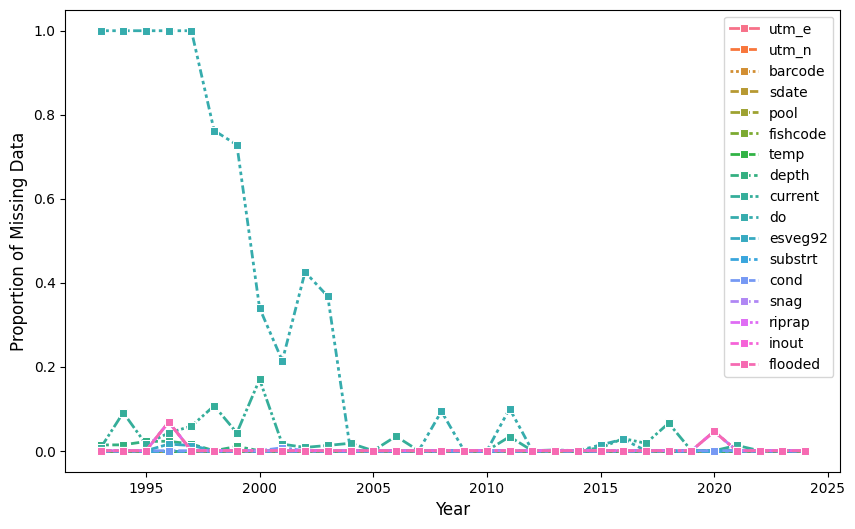

In [38]:
yearly_missing_df = df.groupby('year').apply(lambda x: x.isna().mean(), include_groups=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data = yearly_missing_df,
    ax = ax,
    linewidth = 2,
    marker = 's'
)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Proportion of Missing Data", fontsize = 12);

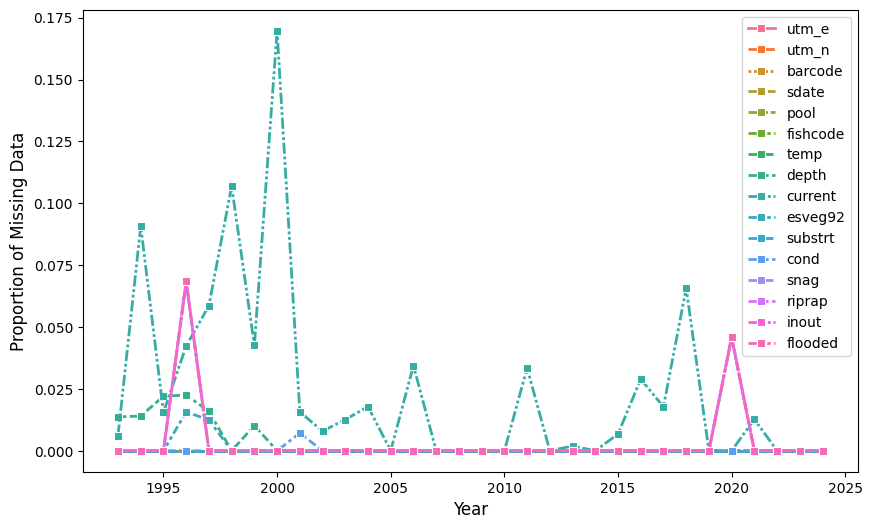

In [39]:
df_nodo = df.drop(columns=['do']).reset_index(drop=True)
yearly_missing_df = df_nodo.groupby('year').apply(lambda x: x.isna().mean(), include_groups=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data = yearly_missing_df,
    ax = ax,
    linewidth = 2,
    marker = 's'
)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Proportion of Missing Data", fontsize = 12);

Keeps only complete cases (rows with no missing data) in the selected columns

In [40]:
#df = df[(df['year'] >= 2004) & (df.isna().sum(axis=1) == 0)].reset_index(drop=True)
df = df[df.isna().sum(axis=1) == 0].reset_index(drop=True)
print(df.shape) # shows the number of rows and columns
df.head()
df['year'].min()

(95631, 18)


1998

In [41]:
print(f"Number of unique samples (identified by barcode)= {df.barcode.unique().shape[0]}")
print(f"Number of unique fishcodes = {df.fishcode.unique().shape[0]}")

Number of unique samples (identified by barcode)= 1733
Number of unique fishcodes = 94


What to do with hybrid fish codes?
1. Remove them (36 observations)
2. Group them by their parent species

In [42]:
hybrid_fish = ['BCWC', 'BGLE', 'BGOS', 'BGRS', 'BGWM', 'CCGF', 'GSBG', 'GSPS', 'GSRS', 'GSWM', 'LNST', 'OSLE', 'PSBG', 'PSOS', 'PSWM', 'SBWB', 'SCBS', 'SGWE', 'SNPD', 'WPYB']  
no_hybrid = df[~df['fishcode'].isin(hybrid_fish)].reset_index(drop=True)
print("before ", df.shape)
print("hybrid removed ", no_hybrid.shape)

before  (95631, 18)
hybrid removed  (95575, 18)


In [24]:
# combine fish codes BGLE, BGOS, BGRS, BGWM into BGhybrid
bg_hybrids = ['BGLE', 'BGOS', 'BGRS', 'BGWM']
gs_hybrids = ['GSBG', 'GSPS', 'GSRS', 'GSWM']
ps_hybrids = ['PSBG', 'PSOS', 'PSWM']
other_hybrids = [h for h in hybrid_fish if h not in (bg_hybrids + gs_hybrids + ps_hybrids)]
# Create combined hybrid dataset
comb_hybrid = df.copy()

# Replace bluegill hybrids with 'BG_hybrid'
comb_hybrid['fishcode'] = comb_hybrid['fishcode'].replace(bg_hybrids, 'BG_hybrid')

# Replace green sunfish hybrids with 'GS_hybrid'
comb_hybrid['fishcode'] = comb_hybrid['fishcode'].replace(gs_hybrids, 'GS_hybrid')

# Replace pumpkinseed hybrids with 'PS_hybrid'
comb_hybrid['fishcode'] = comb_hybrid['fishcode'].replace(ps_hybrids, 'PS_hybrid')

# Remove other hybrids (those not in the three groups)
comb_hybrid = comb_hybrid[~comb_hybrid['fishcode'].isin(other_hybrids)].reset_index(drop=True)

print("Original shape:", df.shape)
print("Combined hybrids shape:", comb_hybrid.shape)
print("Unique fishcodes after combining:", comb_hybrid['fishcode'].nunique())

Original shape: (95631, 18)
Combined hybrids shape: (95626, 18)
Unique fishcodes after combining: 90


Summarize the dataset by grouping by BARCODE, then aggregating environmental and categorical variables, and finally expand fish species presence into separate columns.
-   Numerical columns (e.g., temp, depth, current, do, esveg92, cond) are summarized by their median value for each year/pool combination.
-   Categorical columns (e.g., substrt, pool) use the mode (most frequent value).
-   Presence/absence columns (e.g., snag, riprap, inout, flooded) use the maximum value, assuming binary encoding (0/1).
-   Fish codes are aggregated into a list of all fish species observed in each group.

In [46]:
#df choices....original = df, no_hybrid, comb_hybrid

agg_df = no_hybrid.groupby(['barcode']).agg(
    year=('year', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    utm_e=('utm_e', 'median'),
    utm_n=('utm_n', 'median'),
    median_temp=('temp', 'median'),
    median_depth=('depth', 'median'),
    median_current=('current', 'median'),
    median_do=('do', 'median'),
    median_esveg92=('esveg92', 'median'),    
    mode_substrt=('substrt', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    median_cond=('cond', 'median'),
    snag_present=('snag', 'max'),
    riprap_present=('riprap', 'max'),
    inout_present=('inout', 'max'),
    flooded_present=('flooded', 'max'),
    mode_pool=('pool', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    fish_codes=('fishcode', lambda x: list(x)) # all fish observed on that date
).reset_index()

# Expand fish presence/absence
unique_fish = set([item for sublist in agg_df['fish_codes'] for item in sublist])
# Create only fish presence/absence columns
fish_df = pd.DataFrame({fish: agg_df['fish_codes'].apply(lambda x: fish in x) for fish in unique_fish})
agg_df = pd.concat([agg_df, fish_df], axis=1)   
agg_df.drop(columns=['fish_codes'], inplace=True)
# Add richness column
agg_df['richness'] = fish_df.sum(axis=1)
fish_df['richness'] = fish_df.sum(axis=1)

# Agglomerative  Cluster Analysis
## Outliers
Before we perform the agglomerative clustering, we removed assemblages that are considered substantial outliers. To define these outliers, we computed the pairwise distances between assemblages, and found the median distance to each other assemblage, per-assemblage. This was done for both the cosine and SPAM metrics defined earlier. The resulting distributions are provided below. 


In [44]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

fish_df.shape

(1733, 88)

To stay consistent with previous ecological analyses we will only use the Jaccard distance metric for clustering.

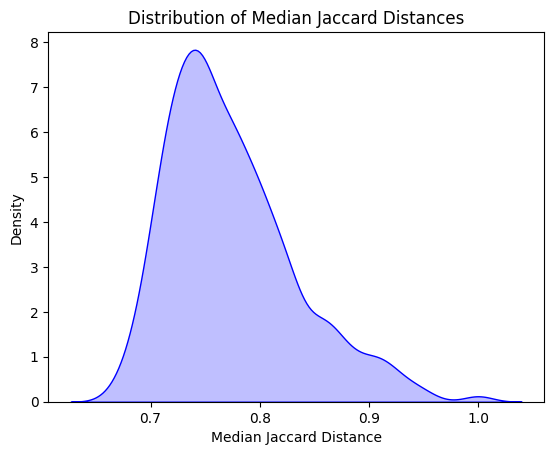

In [47]:
dist_matrix_jac = pdist(1*fish_df, metric='jaccard') 
dist_df_jac = pd.DataFrame(squareform(dist_matrix_jac))

sns.kdeplot(dist_df_jac.median(axis=0), fill=True, color="blue")
plt.xlabel("Median Jaccard Distance")
plt.ylabel("Density")
plt.title("Distribution of Median Jaccard Distances")
plt.show()

Possible outlier, but will not remove any data points.

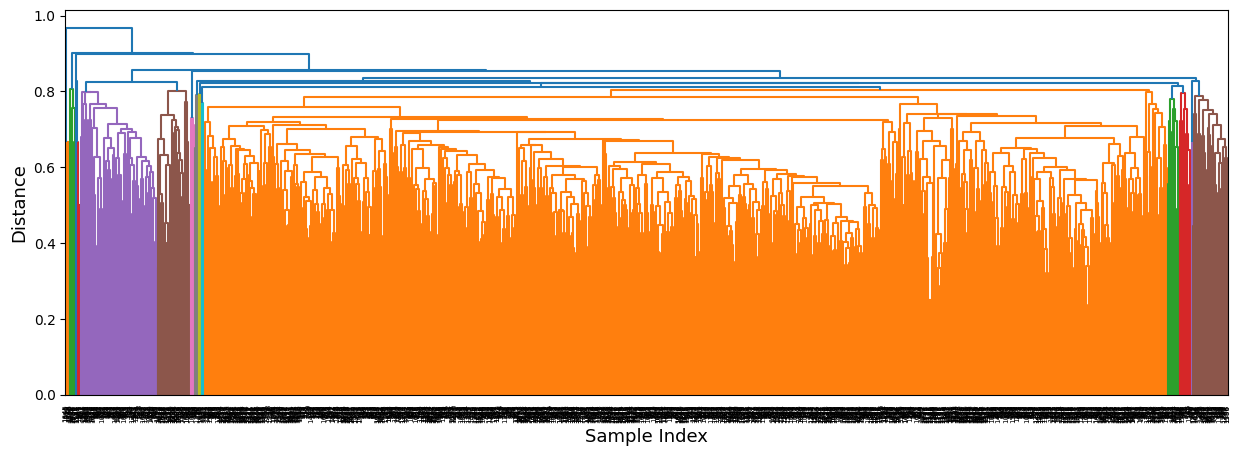

cluster
1        6
2        9
3        7
4        1
5      114
6       50
7        6
8        6
9        4
10       3
11    1438
12      17
13      18
14       2
15      52
dtype: int64


In [28]:
from scipy.cluster.hierarchy import dendrogram 

linked_jaccard = linkage(dist_matrix_jac, method='average')

cluster_threshold = 0.81
plt.figure(figsize=(15, 5))
dendrogram(linked_jaccard, color_threshold=cluster_threshold) # you can change this value to change the number of clusters you get
plt.xlabel("Sample Index", fontsize=13)
plt.ylabel("Distance", fontsize=13)
plt.show()

agg_df['cluster'] = fcluster(linked_jaccard, t=cluster_threshold, criterion='distance')
fish_df['cluster'] = agg_df['cluster']
print(agg_df.groupby('cluster').size())

## Plot threshold vs # of cluster of size 1

## x = time, y = samples, color = cluster

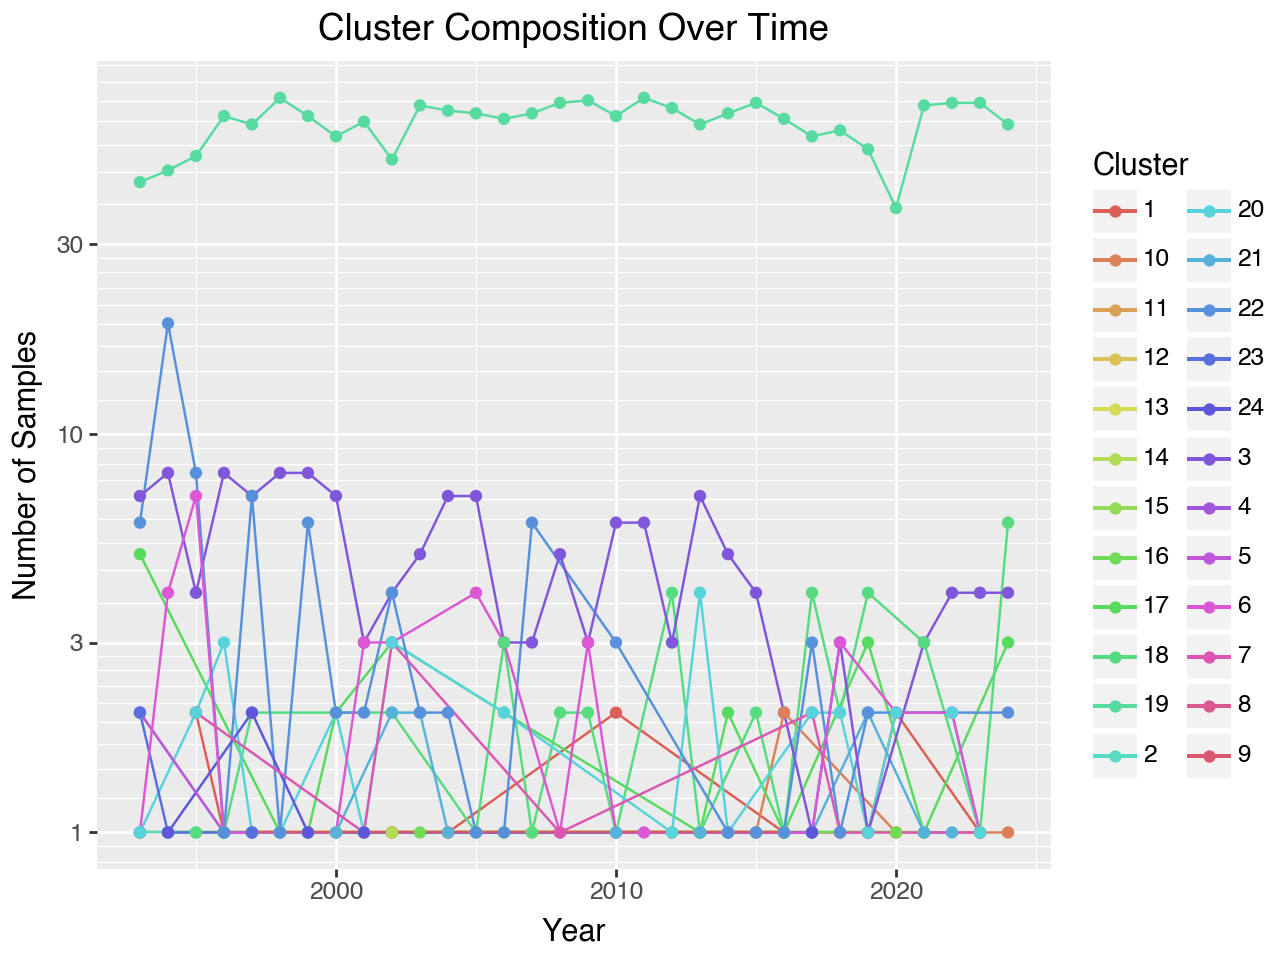

In [105]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, scale_y_log10

# Count samples per year per cluster
cluster_time = agg_df.groupby(['year', 'cluster']).size().reset_index(name='count')
cluster_time['cluster'] = cluster_time['cluster'].astype(str)

# Create the plot
(ggplot(cluster_time, aes(x='year', y='count', color='cluster')) +
 geom_line() +
 geom_point() +
 labs(x='Year', y='Number of Samples', color='Cluster', 
    title='Cluster Composition Over Time') +
 scale_y_log10()
 )

/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic h

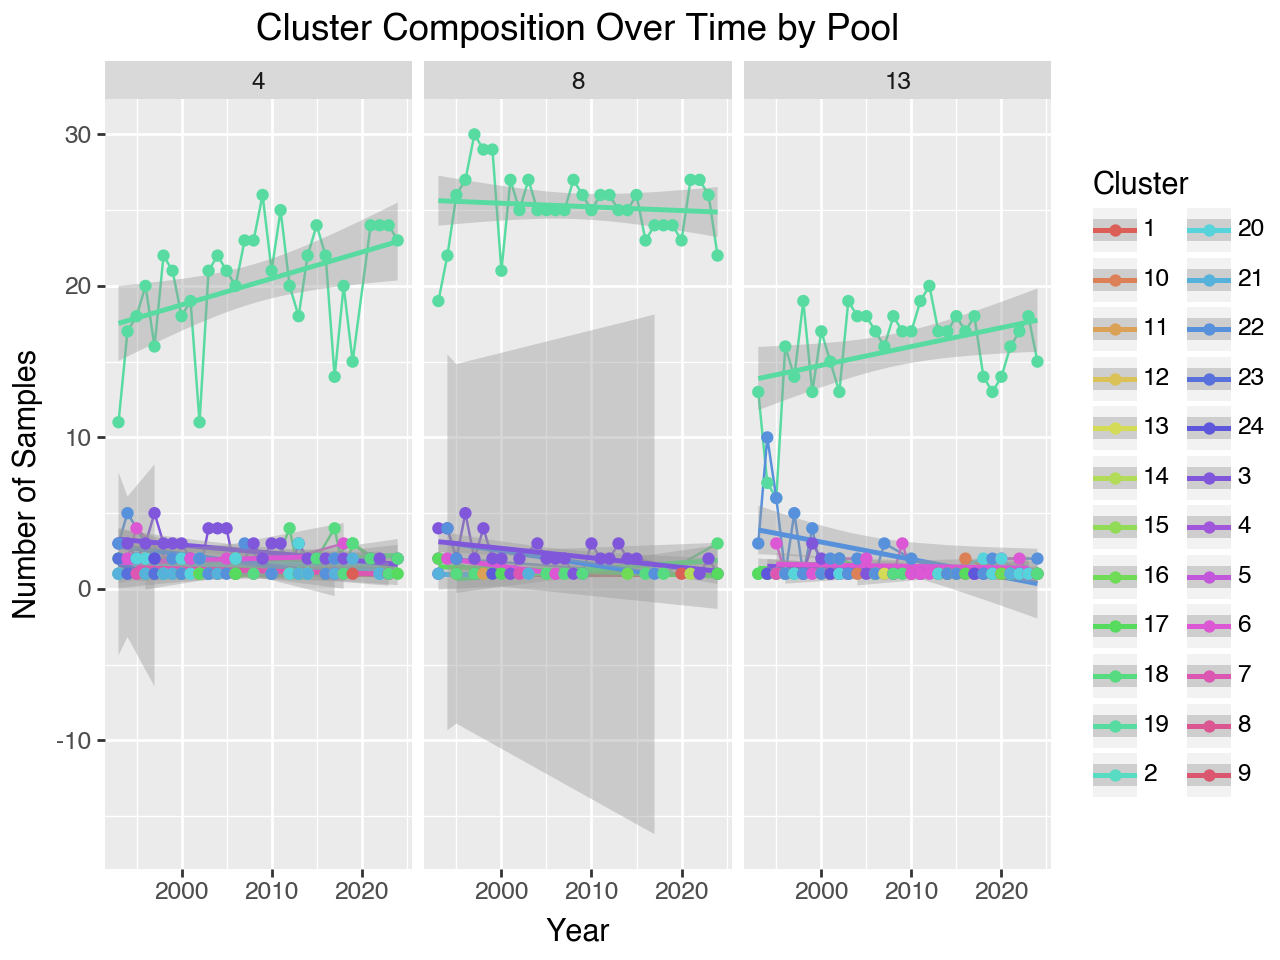

In [114]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, scale_y_log10, facet_wrap

# Count samples per year per cluster per pool
cluster_time_pool = agg_df.groupby(['year', 'cluster', 'mode_pool']).size().reset_index(name='count')
cluster_time_pool['cluster'] = cluster_time_pool['cluster'].astype(str)

# Create the plot with faceting by pool
(ggplot(cluster_time_pool, aes(x='year', y='count', color='cluster')) +
 geom_line() +
 geom_smooth(method = 'lm') +
 geom_point() +
 facet_wrap('~mode_pool') +
 labs(x='Year', y='Number of Samples', color='Cluster', 
    title='Cluster Composition Over Time by Pool') 
    #+
 #scale_y_log10()
 )

In [ ]:
from plotnine import *

/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/minidude/opt/miniconda3/lib/python3.12/site-packages/plotnine/stats

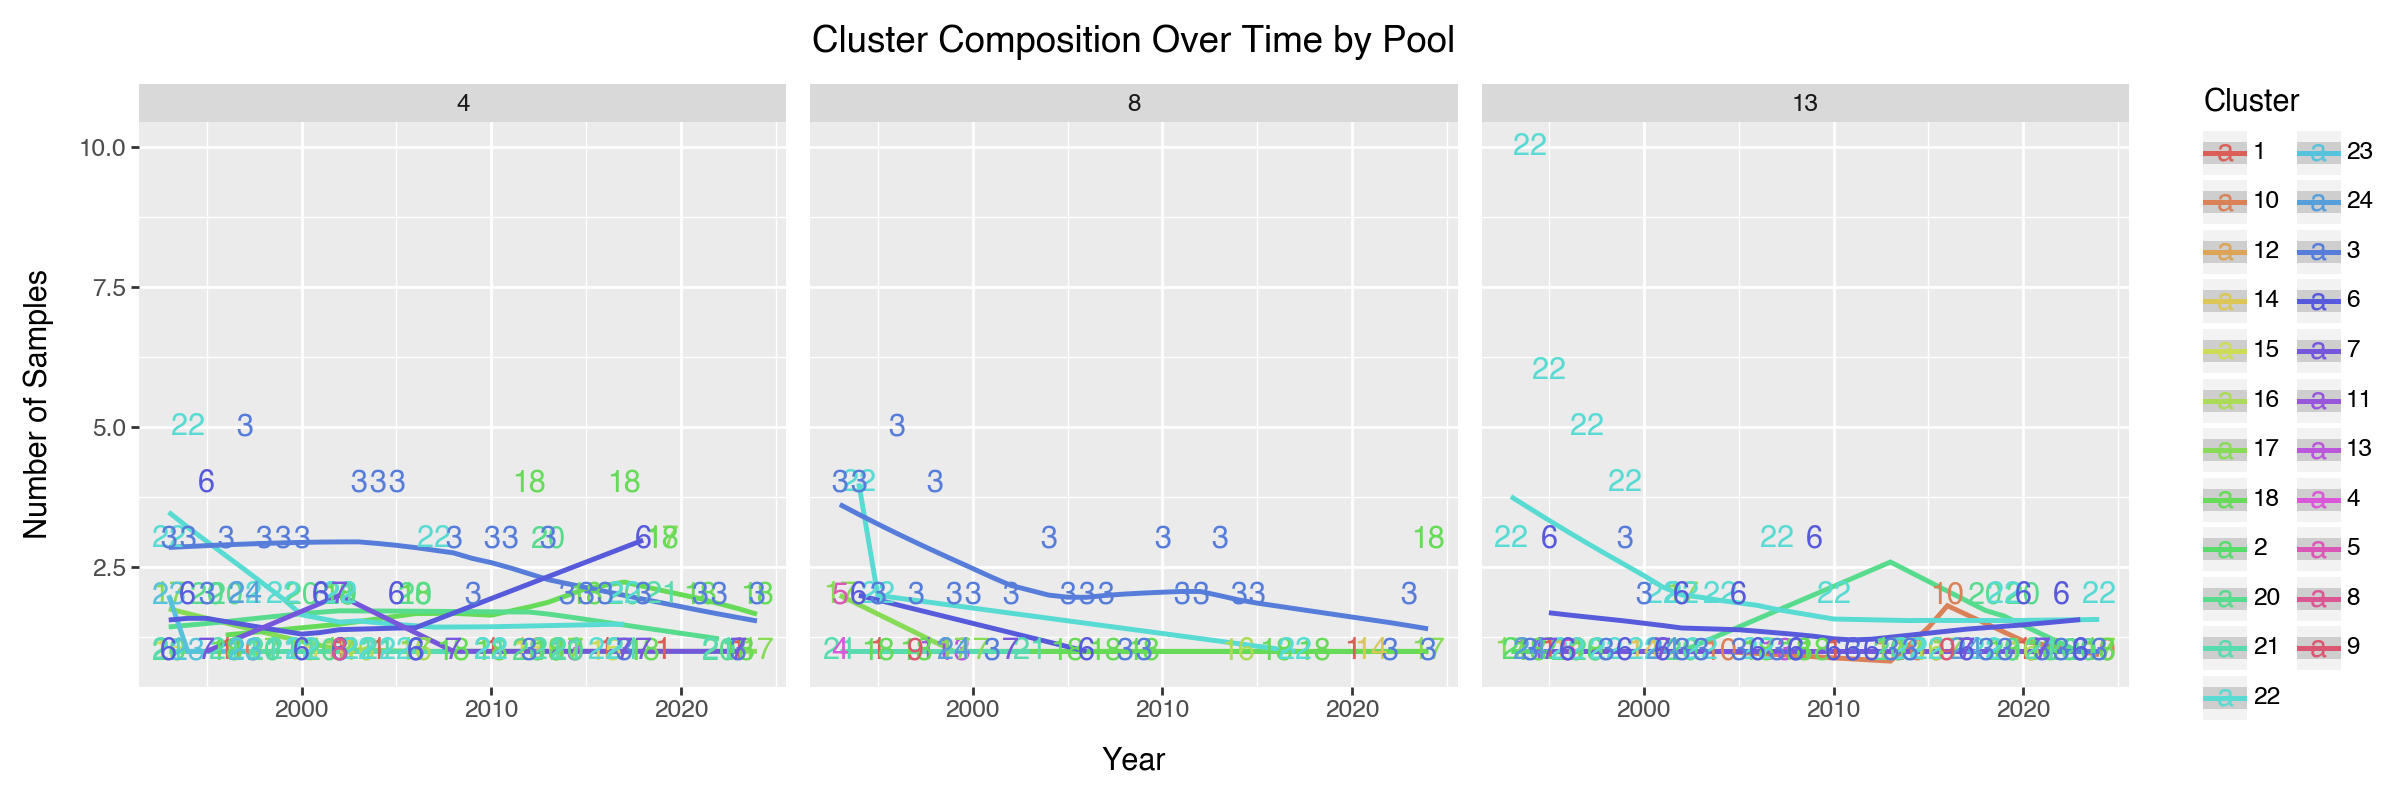

In [110]:
# Count samples per year per cluster per pool
cluster_time_pool = agg_df.groupby(['year', 'cluster', 'mode_pool']).size().reset_index(name='count')
cluster_time_pool['cluster'] = cluster_time_pool['cluster'].astype(str)

# Create the plot with faceting by pool
(ggplot(cluster_time_pool.query('cluster != "19"'), aes(x='year', y='count', color='cluster')) +
# geom_line() +
 #geom_point() +
 facet_wrap('~mode_pool') +
 labs(x='Year', y='Number of Samples', color='Cluster', 
    title='Cluster Composition Over Time by Pool') +
geom_smooth() +
geom_text(aes(label='cluster')) +
 #scale_y_log10() +
 theme(figure_size=(12, 4))  # width=12, height=4 inches
 )

For each cluster, we will summarize the cluster by the median of each environmental variable and the mode of each categorical variable. And then list the fish species and count of each species in the cluster.

In [112]:
# Specify cluster to analyze
cluster_num = 22

# Filter data for this cluster
cluster_data = agg_df[agg_df['cluster'] == cluster_num]
cluster_fish_data = df_data[df_data['barcode'].isin(cluster_data['barcode'])]

# Environmental variables summary (median)
env_vars = ['median_temp', 'median_depth', 'median_current', 'median_esveg92', 'median_cond']
env_summary = cluster_data[env_vars].median()

# Categorical variables summary (mode)
cat_vars = ['mode_substrt']
cat_summary = cluster_data[cat_vars].mode().iloc[0]

# Binary variables summary (proportion present)
binary_vars = ['snag_present', 'riprap_present', 'inout_present', 'flooded_present']
binary_summary = cluster_data[binary_vars].mean()

# Fish species counts
fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns=['richness', 'cluster'])
species_counts = fish_in_cluster.sum().sort_values(ascending=False)
species_counts = species_counts[species_counts > 0]

cluster_barcodes = agg_df[agg_df['cluster'] == cluster_num]['barcode']

# Total individuals caught
fish_abundance = df[df['barcode'].isin(cluster_barcodes)].groupby('fishcode').size()
fish_length = cluster_fish_data.groupby('fishcode')['length'].mean()
#fish_weight = cluster_fish_data.groupby('fishcode')['weight'].mean()

# Number of samples where present
fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns=['richness', 'cluster'])
fish_occurrence = fish_in_cluster.sum()

# Combine
species_summary = pd.DataFrame({
    'total_caught': fish_abundance,
    'samples': fish_occurrence,
    'mean_length': round(fish_length,1),
#    'mean_weight': fish_weight
}).fillna(0).astype({'total_caught': int, 'samples': int})
species_summary = species_summary[species_summary['samples'] > 0].sort_values('samples', ascending=False)


# Print summary
print(f"=== CLUSTER {cluster_num} SUMMARY ===")
print(f"\nTotal samples (identified by barcode): {len(cluster_data)}")
print("\n--- Environmental Variables (Median) ---")
print(env_summary)
print("\n--- Categorical Variables (Mode) ---")
print(cat_summary)
print("\n--- Binary Variables (Proportion Present) ---")
print(binary_summary)
print(f"\n--- Fish Species (Count of {len(cluster_data)} samples) ---")
print(species_summary)

=== CLUSTER 22 SUMMARY ===

Total samples (identified by barcode): 82

--- Environmental Variables (Median) ---
median_temp        14.000
median_depth        1.100
median_current      0.215
median_esveg92      0.000
median_cond       395.500
dtype: float64

--- Categorical Variables (Mode) ---
mode_substrt    3.0
Name: 0, dtype: float64

--- Binary Variables (Proportion Present) ---
snag_present       0.585366
riprap_present     0.024390
inout_present      0.060976
flooded_present    0.134146
dtype: float64

--- Fish Species (Count of 82 samples) ---
      total_caught  samples  mean_length
CARP           509       78        560.3
ERSN           239       68         58.3
FWDM           156       62        215.8
WTBS           144       58        160.9
GZSD           323       57        155.8
SHRH           166       41        338.5
SGER           106       38        190.1
SMBF            60       30        388.5
CNCF            45       24        375.9
LMBS            67       22      

In [45]:
# Summarize all clusters at once
for cluster_num in sorted(agg_df['cluster'].unique()):
    cluster_data = agg_df[agg_df['cluster'] == cluster_num]
    cluster_fish_data = df_data[df_data['barcode'].isin(cluster_data['barcode'])]
    
    # Environmental variables summary (median)
    env_vars = ['median_temp', 'median_depth', 'median_current', 'median_esveg92', 'median_cond']
    env_summary = cluster_data[env_vars].median()

    # Categorical variables summary (mode)
    cat_vars = ['mode_substrt']
    cat_summary = cluster_data[cat_vars].mode().iloc[0]

    # Binary variables summary (proportion present)
    binary_vars = ['snag_present', 'riprap_present', 'inout_present', 'flooded_present']
    binary_summary = cluster_data[binary_vars].mean()

    # Fish species counts
    fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns=['richness', 'cluster'])
    species_counts = fish_in_cluster.sum().sort_values(ascending=False)
    species_counts = species_counts[species_counts > 0]

    cluster_barcodes = agg_df[agg_df['cluster'] == cluster_num]['barcode']

    # Total individuals caught
    fish_abundance = df[df['barcode'].isin(cluster_barcodes)].groupby('fishcode').size()
    fish_length = cluster_fish_data.groupby('fishcode')['length'].mean()
    #fish_weight = cluster_fish_data.groupby('fishcode')['weight'].mean()

    # Number of samples where present
    fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns=['richness', 'cluster'])
    fish_occurrence = fish_in_cluster.sum()

    # Combine
    species_summary = pd.DataFrame({
        'total_caught': fish_abundance,
        'samples': fish_occurrence,
        'mean_length': round(fish_length,1),
#    'mean_weight': fish_weight
    }).fillna(0).astype({'total_caught': int, 'samples': int})
    species_summary = species_summary[species_summary['samples'] > 0].sort_values('samples', ascending=False)


    # Print summary
    print(f"=== CLUSTER {cluster_num} SUMMARY ===")
    print(f"\nTotal samples (identified by barcode): {len(cluster_data)}")
    print("\n--- Environmental Variables (Median) ---")
    print(env_summary)
    print("\n--- Categorical Variables (Mode) ---")
    print(cat_summary)
    print("\n--- Binary Variables (Proportion Present) ---")
    print(binary_summary)
    print(f"\n--- Fish Species (Count of {len(cluster_data)} samples) ---")
    print(species_summary)

=== CLUSTER 1 SUMMARY ===

Total samples (identified by barcode): 6

--- Environmental Variables (Median) ---
median_temp         8.15
median_depth        1.25
median_current      0.12
median_esveg92      0.00
median_cond       362.00
dtype: float64

--- Categorical Variables (Mode) ---
mode_substrt    1.0
Name: 0, dtype: float64

--- Binary Variables (Proportion Present) ---
snag_present       0.500000
riprap_present     0.000000
inout_present      0.166667
flooded_present    0.333333
dtype: float64

--- Fish Species (Count of 6 samples) ---
      total_caught  samples  mean_length
ERSN            11        2         46.0
BWFN             1        1        540.0
GZSD            11        1        117.7
SMBF             1        1        565.0
SMBS             3        1        116.7
=== CLUSTER 2 SUMMARY ===

Total samples (identified by barcode): 9

--- Environmental Variables (Median) ---
median_temp        12.70
median_depth        1.20
median_current      0.36
median_esveg92      

Possiblly filter largemouth bass and bluegull and run clustering again.

Within a species in cluster, data exploration on length, weight across barcodes.
Show for various species in cluster


In [57]:
fish_df.groupby('cluster').sum()

,SFSN,WTSK,BMBF,SVMW,BKBF,MNEY,SGER,BLGL,BWFN,SNGR,GZSD,CARP,SNSN,SMBF,TTPH,LMBS,MQTF,FTDR,PDFH,GDRH,YLBH,MMSN,PRPH,GSPK,LKSG,BKBH,ERSN,JYDR,PNSD,SHCB,SMBS,STCT,BSDR,BKCP,CMMW,SVLP,BKSB,ABLP,YWPH,WSDR,RVRH,WRMH,RVSN,RVCS,RKBS,GNSF,IODR,BNMW,BUSK,WDSN,FWDM,BDDR,MDDR,LSSR,YWBS,BRBT,NTPK,BNBH,QLBK,SVCB,PDSN,SPSK,WTCP,FHCF,BKSS,LNGR,SHDR,NHSK,LGPH,CLDR,STSN,CNCF,RESF,GSOS,BHMW,TPMT,RRDR,SVRH,WLYE,CNLP,OSSF,HFCS,SHRH,FHMW,WTBS,GDSN,PGMW,richness
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,0,0,3,0,2,1,0,1,0,5,1,4,0,7,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,8,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,1,8,0,1,0,0,61
3,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
4,17,4,5,2,1,6,18,31,5,5,78,35,0,8,0,50,0,1,2,58,0,9,0,0,1,0,53,8,4,0,112,0,0,5,1,2,1,0,21,2,57,0,4,7,12,4,1,0,9,7,46,0,1,0,2,1,15,0,22,0,0,1,0,10,3,4,5,8,28,0,4,36,0,0,11,1,0,90,75,4,2,0,155,0,24,3,0,1197
5,0,0,0,0,0,0,0,3,1,0,0,2,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,1,0,3,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30
6,649,53,91,10,52,34,370,1363,301,36,768,804,13,93,8,1371,2,0,2,382,72,528,14,11,0,10,1020,219,449,1,678,1,1,612,17,43,0,9,934,8,41,63,207,80,593,185,3,22,2,472,462,8,39,1,20,2,573,11,93,38,19,433,101,67,472,83,23,12,365,1,415,242,1,1,562,54,8,380,290,37,123,20,776,8,282,273,131,19123


In [46]:
# Filter rows where cluster equals
cluster_num = 3
fish_df[agg_df['cluster'] == cluster_num].head()
# identify the fish species in that cluster that are TRUE
fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns='richness')
#fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].iloc[:, len(meta_cols):-1]  # Exclude metadata columns and richness
fish_in_cluster = fish_in_cluster.drop(columns=['cluster'])
species_in_cluster = fish_in_cluster.columns[fish_in_cluster.any()].tolist()
print(f"Fish species in cluster {cluster_num}: {species_in_cluster}")

Fish species in cluster 3: ['BLGL', 'LMBS', 'MMSN', 'PNSD', 'YWPH', 'QLBK', 'SHRH']


Do we want to filter clusters below a certain size?

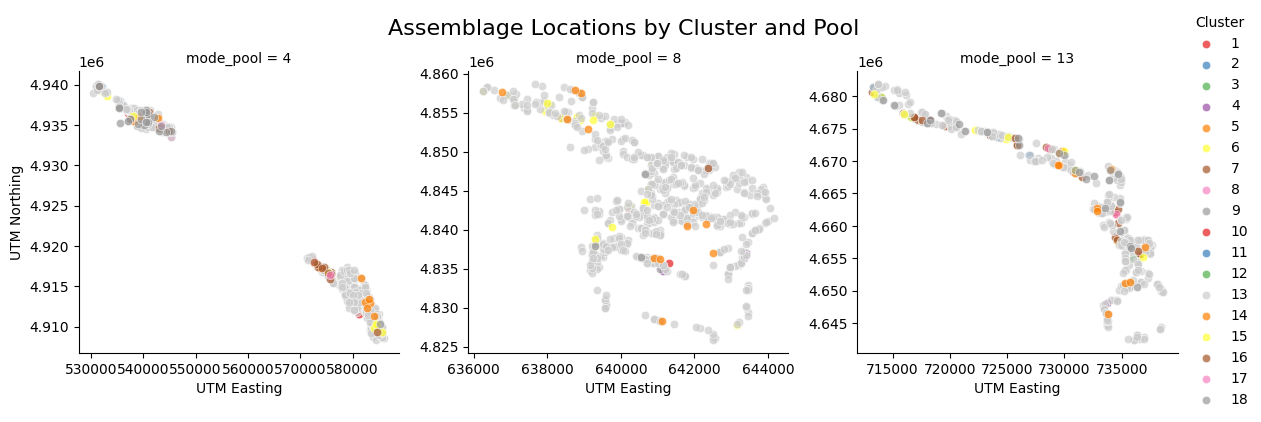

In [64]:
# Find the cluster with the largest count
cluster_sizes = agg_df['cluster'].value_counts()
largest_cluster = agg_df['cluster'].value_counts().idxmax()
unique_clusters = sorted(agg_df['cluster'].unique())
size_map = {c: f"{cluster_sizes[c]} sites" for c in unique_clusters}
palette = sns.color_palette("Set1", n_colors=len(unique_clusters))
light_color = (0.8, 0.8, 0.8)  # RGB for light gray

# Assign palette, but set largest cluster to light gray
color_map = {c: col for c, col in zip(unique_clusters, palette)}
color_map[largest_cluster] = light_color

g = sns.FacetGrid(
    agg_df,
    col="mode_pool",
    hue="cluster",
    palette=color_map,
    col_wrap=3,
    height=4,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.scatterplot, x="utm_e", y="utm_n", alpha=0.7)
g.add_legend(title="Cluster")
g.set_axis_labels("UTM Easting", "UTM Northing")
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle("Assemblage Locations by Cluster and Pool", fontsize=16)
plt.show()

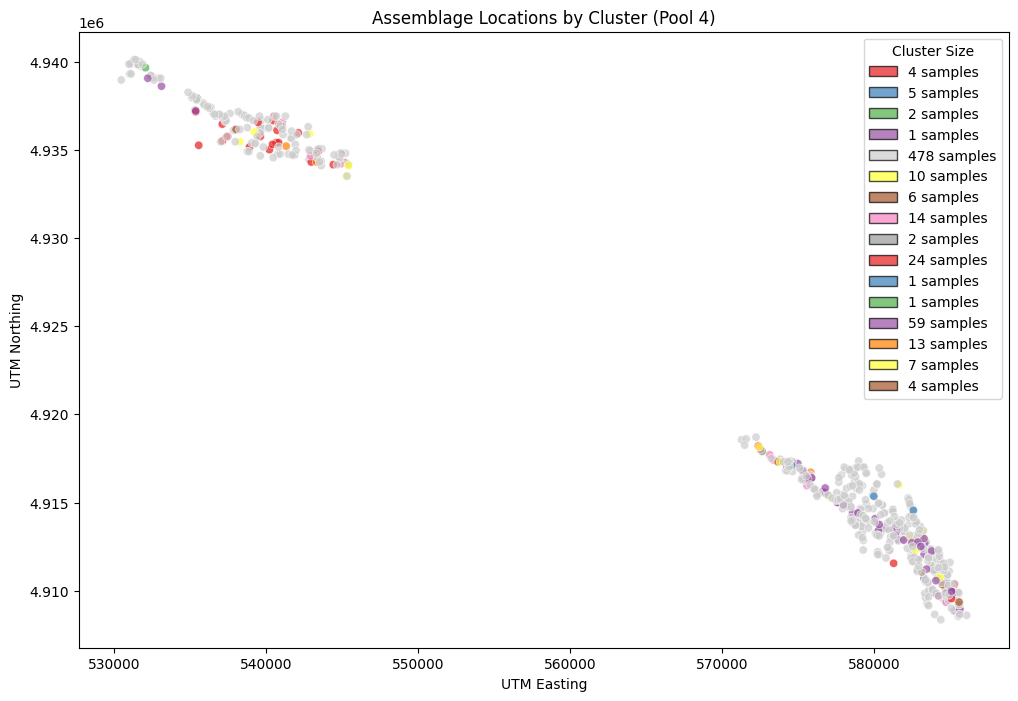

In [65]:
from matplotlib.patches import Patch

# FILTER by pool
pool_filter = 4
available_pools = sorted(agg_df['mode_pool'].unique().tolist())

if pool_filter not in available_pools:
    print(f"No rows for mode_pool == {pool_filter}. Available pools: {available_pools}")
else:
    df_pool = agg_df[agg_df['mode_pool'] == pool_filter].copy()
    df_pool['cluster'] = df_pool['cluster'].astype(str)

    #  Map cluster labels to cluster sizes for legend
    cluster_sizes_pool = df_pool['cluster'].value_counts()
    unique_clusters_pool = sorted(df_pool['cluster'].unique())

    palette = sns.color_palette("Set1", n_colors=len(unique_clusters_pool) or 1)
    light_color = (0.8, 0.8, 0.8)  # RGB for light gray
    color_map = {c: col for c, col in zip(unique_clusters_pool, palette)}
    if not cluster_sizes_pool.empty:
        largest_cluster_pool = cluster_sizes_pool.idxmax()
        color_map[largest_cluster_pool] = light_color
    size_map = {c: f"{cluster_sizes_pool[c]} samples" for c in unique_clusters_pool}

    # Plot with legend showing cluster size
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=df_pool,
        x="utm_e",
        y="utm_n",
        hue="cluster",
        palette=color_map,
        alpha=0.7
    )

    legend_handles = [Patch(facecolor=color_map[c], edgecolor='k', alpha=0.7) for c in unique_clusters_pool]
    legend_labels = [size_map[c] for c in unique_clusters_pool]
    if legend_handles:
        plt.legend(handles=legend_handles, labels=legend_labels, title="Cluster Size")
    plt.xlabel("UTM Easting")
    plt.ylabel("UTM Northing")
    plt.title(f"Assemblage Locations by Cluster (Pool {pool_filter})")
    plt.show()

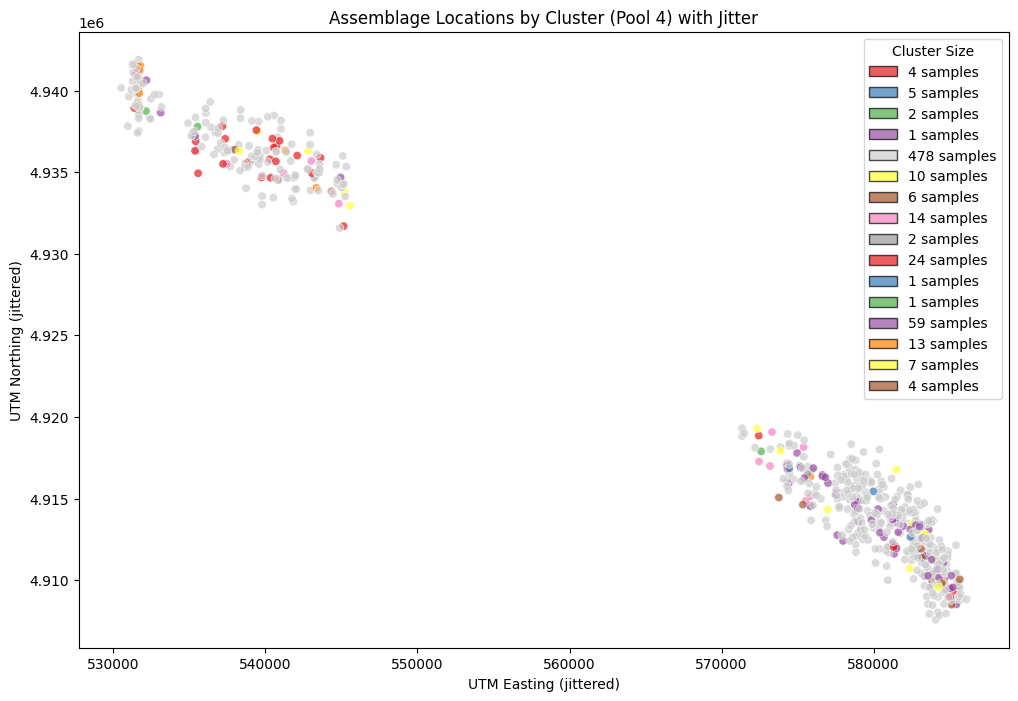

In [66]:
# Add jitter to UTM coordinates
rng = np.random.default_rng(seed=42)
jitter_scale = [100, 1000]  # Adjust as needed for your data scale
df_pool['utm_e_jitter'] = df_pool['utm_e'] + rng.normal(0, jitter_scale[0], size=len(df_pool))
df_pool['utm_n_jitter'] = df_pool['utm_n'] + rng.normal(0, jitter_scale[1], size=len(df_pool))

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_pool,
    x="utm_e_jitter",
    y="utm_n_jitter",
    hue="cluster",
    palette=color_map,
    alpha=0.7
)

# Recompute size map using string cluster labels (df_pool['cluster'] already cast to str in earlier cell)
unique_clusters_pool = sorted(df_pool['cluster'].unique())
cluster_sizes_pool = df_pool['cluster'].value_counts()
size_map_pool = {c: f"{cluster_sizes_pool[c]} samples" for c in cluster_sizes_pool.index}

legend_handles = [Patch(facecolor=color_map[c], edgecolor='k', alpha=0.7) for c in unique_clusters_pool]
legend_labels = [size_map_pool[c] for c in unique_clusters_pool]

plt.legend(handles=legend_handles, labels=legend_labels, title="Cluster Size")
plt.xlabel("UTM Easting (jittered)")
plt.ylabel("UTM Northing (jittered)")
plt.title(f"Assemblage Locations by Cluster (Pool {pool_filter}) with Jitter")
plt.show()

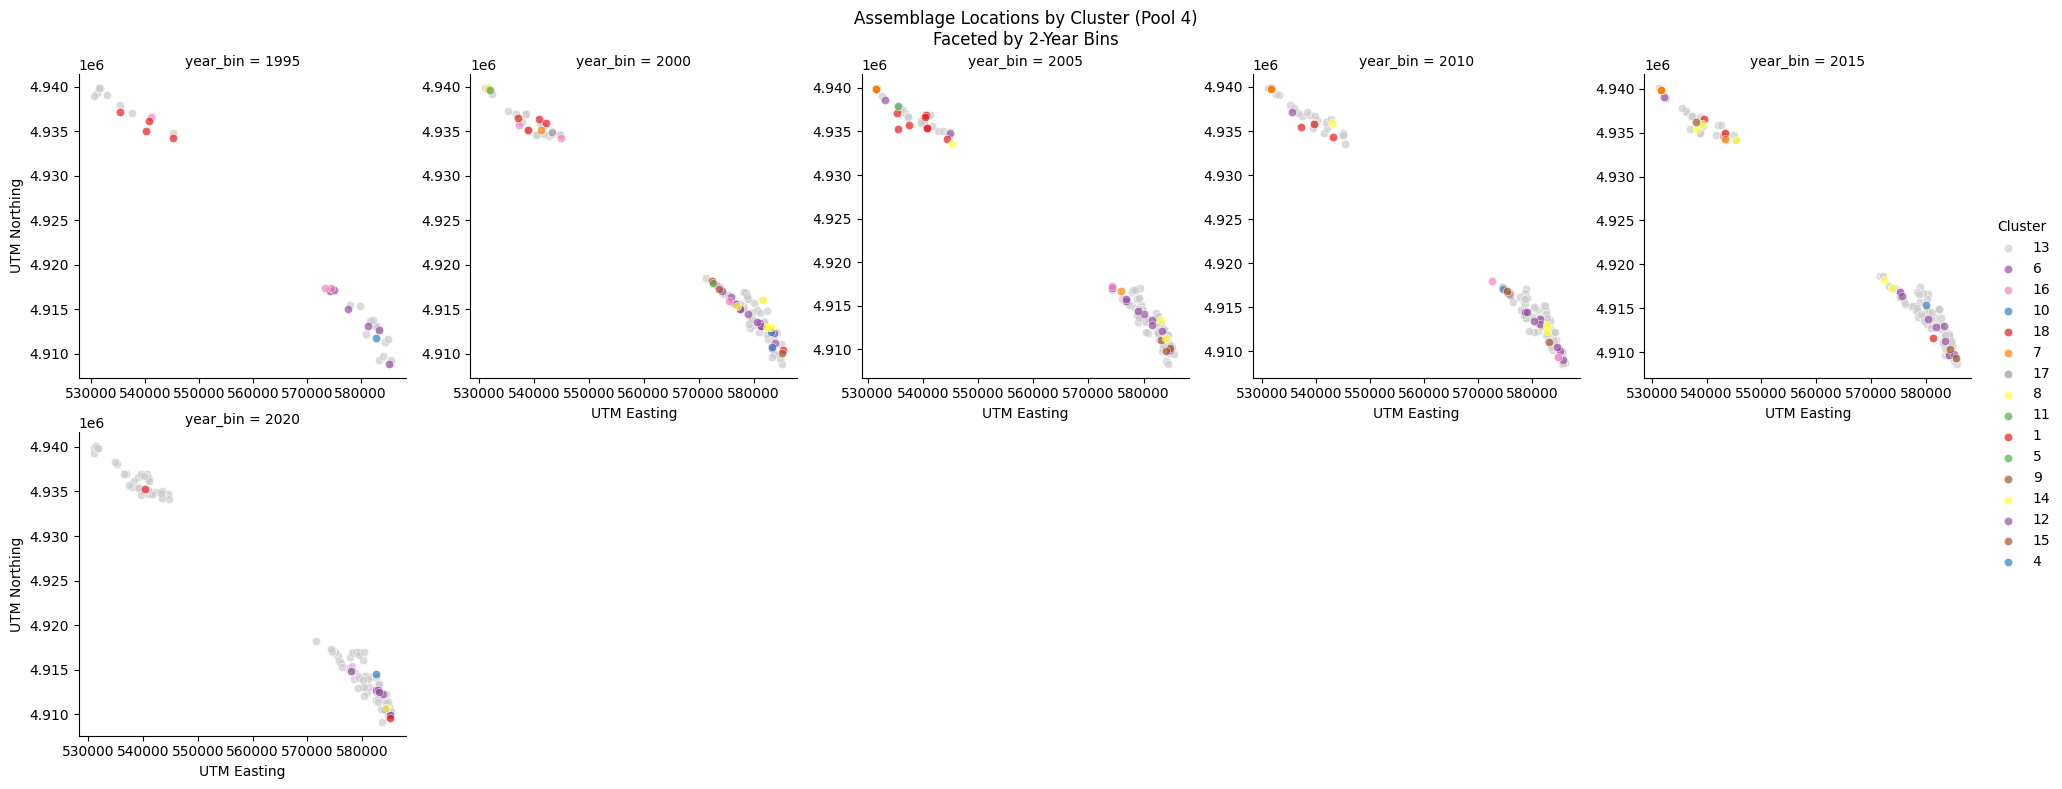

In [69]:
# Create a new column for year bins
df_pool['year_bin'] = (df_pool['year'] // 5) * 5

# Create the FacetGrid
g = sns.FacetGrid(
    df_pool,
    col="year_bin",
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=False,
    hue="cluster",
    palette=color_map
)
g.map_dataframe(
    sns.scatterplot,
    x="utm_e",
    y="utm_n",
    alpha=0.7
)
g.add_legend(title="Cluster")
g.set_axis_labels("UTM Easting", "UTM Northing")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("Assemblage Locations by Cluster (Pool {})\nFaceted by 2-Year Bins".format(pool_filter))
plt.show()

Homogenization of largest cluster over time?

## Cluster Characteristics

We next inspected how each cluster varied in it’s species composition.

We will produce three vertical heatmaps for the Jaccard clustering method. Each heatmap shows the average percent presence of each fish species (rows) within each cluster (columns).

*What the graph means:*

-   **Columns**: Each column is a cluster of assemblages (sites grouped by fish community similarity).
-   **Rows**: Each row is a fish species (only those present in >10% of any cluster).
-   **Cell values**: The number in each cell is the percent of assemblages in that cluster where the species is present (0–100%).
-   **Color**: Darker blue = higher percent presence.
-   **Interpretation**: You can see which species are common or rare in each cluster, and how species composition differs between clusters and clustering methods.

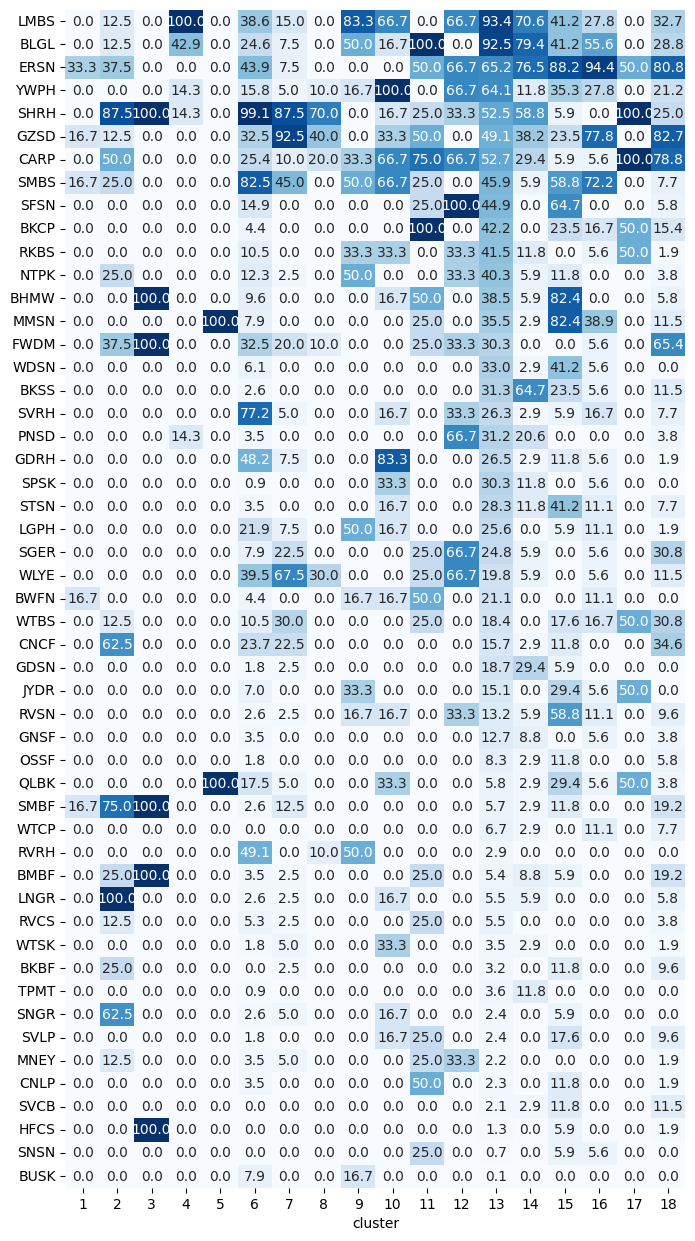

In [60]:
# Order species by overall frequency of occurrence (sum across columns)
species_cols = [c for c in fish_df.columns if c not in ['richness', 'cluster']]
species_order = fish_df[species_cols].sum(axis=0).sort_values(ascending=False).index.tolist()

# Compute percent presence per cluster using agg_df (which has 'cluster')
fish_df['cluster'] = agg_df['cluster']
jac_comp = fish_df.groupby('cluster')[species_order].mean() * 100

# Keep species present in >10% of at least one cluster
filt = jac_comp.max() > 10
jac_comp = jac_comp.loc[:, filt]

# Plot heatmap (species as rows)
plt.figure(figsize=(8, 0.3 * jac_comp.shape[1]))
sns.heatmap(jac_comp.T, cmap='Blues', annot=True, fmt=".1f", cbar=False)
plt.show()

Notice difference between largemouth bass and smallmouth bass. For example, cluster 4 vs. 6.

# Hydrological EDA

For each clustering method, we can visualize how the clusters differ in terms of hydrological variables. Below are boxplots for each variable, faceted by clustering method. Each boxplot shows the distribution of the variable within each cluster.

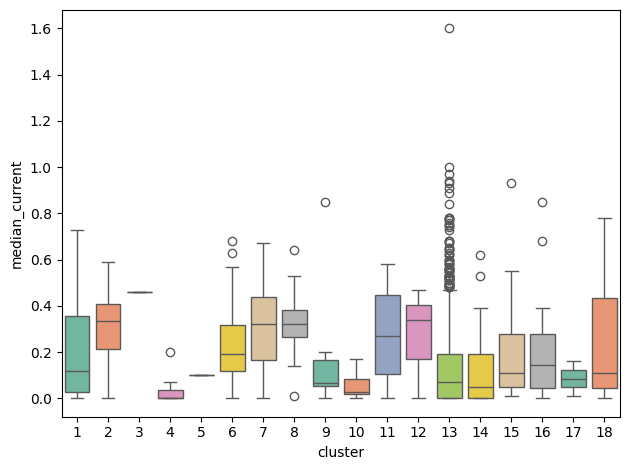

In [62]:
import matplotlib.pyplot as plt

sns.boxplot(x='cluster', y='median_current', hue='cluster', data=agg_df, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

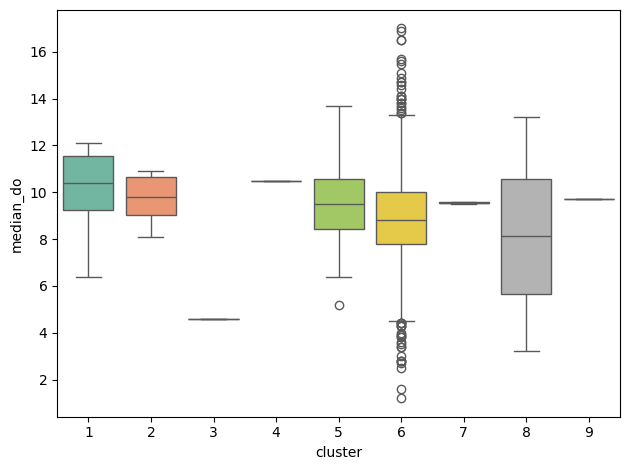

In [27]:
sns.boxplot(x='cluster', y='median_do', hue='cluster', data=agg_df, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

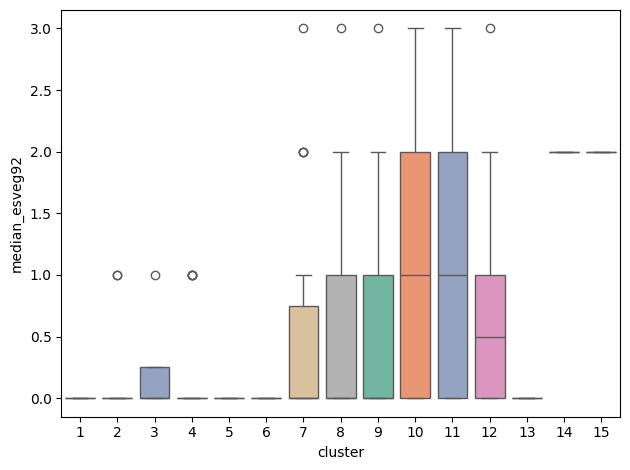

In [31]:
sns.boxplot(x='cluster', y='median_esveg92', hue='cluster', data=agg_df, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

## Decision Tree

In [32]:
agg_df.head()

,barcode,year,utm_e,utm_n,median_temp,median_depth,median_current,median_do,median_esveg92,mode_substrt,median_cond,snag_present,riprap_present,inout_present,flooded_present,mode_pool,RKBS,LGPH,BKSB,SBWB,GSPK,GSOS,CARP,PGMW,BNBH,CNLP,BSDR,LNGR,QLBK,NFSH,ERSN,BMBF,NTPK,OSSF,PRPH,RESF,LMBS,NHSK,STSN,SMBS,SNSN,WTSK,GDRH,SHCB,ABLP,GDSN,RVRH,TPMT,BHMW,PSBG,FWDM,SFSN,SVCB,MQTF,CMMW,GSPS,YWPH,CNCF,SHDR,YWBS,HFCS,WTCP,PNSD,SGWE,BUSK,RVSN,SVMW,PDFH,SGER,SNGR,GSBG,MMSN,BKSS,BDDR,BGWM,SPSK,JYDR,LKSG,GNSF,FHMW,BKBF,BKCP,GZSD,CLDR,WTBS,FHCF,RRDR,WDSN,WSDR,YLBH,WRMH,SVLP,STCT,PDSN,SVRH,LSSR,BNMW,WLYE,PSWM,TTPH,BKBH,IODR,BWFN,SMBF,BRBT,MDDR,MNEY,SHRH,BLGL,RVCS,cluster
0,11004513,2004,584880.0,4909558.0,20.7,2.0,0.19,7.3,1.0,4.0,472.0,0.0,1.0,0.0,0.0,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,11
1,11004514,2004,584930.0,4911108.0,17.3,2.2,0.26,5.1,1.0,1.0,297.0,1.0,0.0,0.0,0.0,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,11
2,11004515,2004,583630.0,4912208.0,20.2,0.5,0.08,7.6,2.0,3.0,317.0,1.0,0.0,0.0,0.0,4,True,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,11
3,11004517,2004,583380.0,4909608.0,20.1,1.3,0.09,6.3,3.0,3.0,474.0,0.0,0.0,0.0,0.0,4,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,11
4,11004518,2004,581180.0,4913108.0,20.0,2.8,0.12,6.1,1.0,4.0,472.0,0.0,1.0,0.0,0.0,4,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,11


In [33]:
train_features = ['median_temp', 'median_esveg92', 'mode_substrt', 'median_current']

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(agg_df[train_features], agg_df['cluster'], test_size=0.2, random_state=42, shuffle=True)

clf = DecisionTreeClassifier(max_depth = 2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [35]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


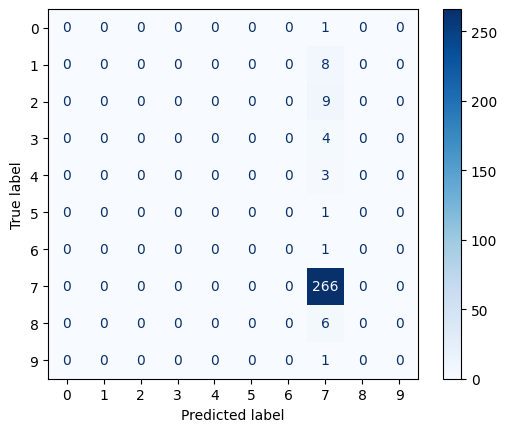

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can customize the colormap

plt.show()

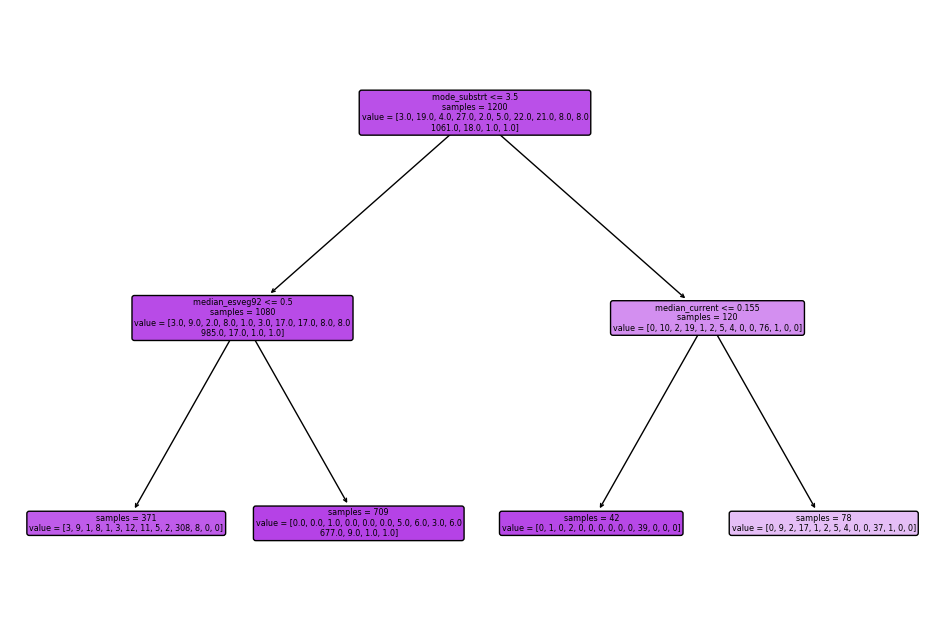

In [ ]:
from sklearn.tree import plot_tree

# Assuming `clf` is your trained DecisionTreeClassifier model
plt.figure(figsize=(12,8))  # Adjust the size to fit your tree
plot_tree(clf, filled=True, feature_names=train_features,  class_names=['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'], rounded=True, impurity=False)
plt.show()